In [46]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

# attempt 1
could not get it to work, it was that i was missing '()' when setting the linear regression
also, date does not seem to work without changing datatype. did not want to erase work.

In [47]:
prelimdf = pd.read_csv('Data/prelimdf.csv')

In [48]:
prelimdf.shape

(5528, 8)

In [49]:
prelimdf.head(1)

,Unnamed: 0,title,num_reviews,release_date,been_sale,orig_price,num_tags,num_genres
0,0,Sea of Thieves,111078,2020-06-03,1,39.99,20.0,2.0


In [50]:
prelimdf.drop(columns=['Unnamed: 0'],inplace=True)

In [51]:
prelimdf.head(1)

,title,num_reviews,release_date,been_sale,orig_price,num_tags,num_genres
0,Sea of Thieves,111078,2020-06-03,1,39.99,20.0,2.0


In [9]:
# prelim df contains all games with number of reviews, and only numeric columns
# that had no null columns (so excluding num of languages) using this df
# using this to start to model a lr

In [52]:
lr = LinearRegression()
X = prelimdf[['release_date''been_sale','orig_price','num_tags','num_genres']]
y = prelimdf[['num_reviews']]

In [53]:
lr.fit(X, y) # unsure why tis is saying missing 'y'

ValueError: could not convert string to float: '2020-06-03'

In [55]:
y

,num_reviews
0,111078
1,11813
2,216651
3,45704
4,256136
...,...
5523,155
5524,960
5525,56
5526,65


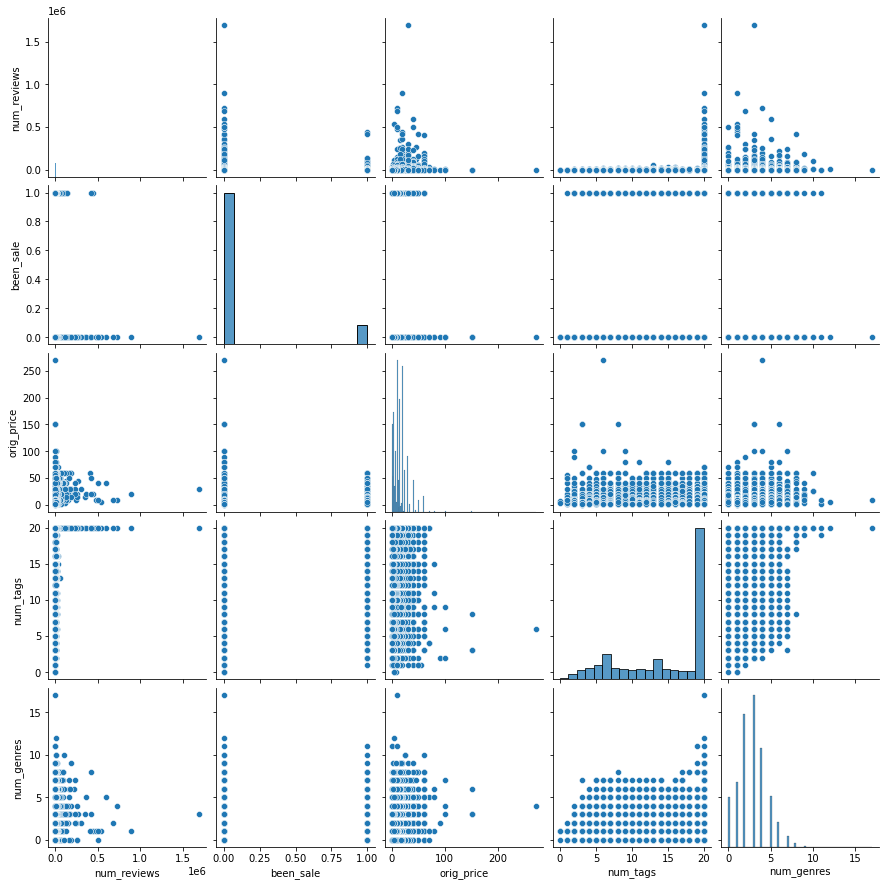

In [56]:
sns.pairplot(prelimdf)

In [21]:
lr.fit(prelimdf[['release_date','been_sale','orig_price','num_tags','num_genres']], prelimdf['num_reviews'])

TypeError: fit() missing 1 required positional argument: 'y'

In [22]:
#WHYYY

In [23]:
prelimdf.head(1)

,title,num_reviews,release_date,been_sale,orig_price,num_tags,num_genres
0,Sea of Thieves,111078,2020-06-03,1,39.99,20.0,2.0


In [24]:
numbersdf = prelimdf[['num_reviews','release_date','been_sale','orig_price','num_tags','num_genres']]

<AxesSubplot:>

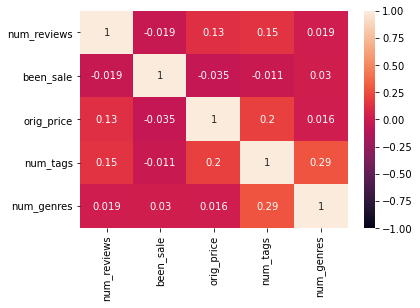

In [26]:
sns.heatmap(numbersdf.corr(),vmin = -1, vmax = 1, annot=True)

In [41]:
features, target = ['been_sale','orig_price','num_tags','num_genres'], ['num_reviews']

In [42]:
X, y = numbersdf[features], numbersdf[target]

In [43]:
lr.fit(X,y)

LinearRegression()

In [45]:
lr.score

<bound method RegressorMixin.score of LinearRegression()>

In [35]:
numbersdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5528 entries, 0 to 5527
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_reviews   5528 non-null   int64  
 1   release_date  5526 non-null   object 
 2   been_sale     5528 non-null   int64  
 3   orig_price    5528 non-null   float64
 4   num_tags      5528 non-null   float64
 5   num_genres    5528 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 259.2+ KB


# attempt 2 - sklearn
figured out (thanks to joan) i was missing parentheses on LinearRegression.
also, date is not working for datatype. without erasing work , starting over without date

may have to change date to just the year, and have it set as year released. but for now..

In [57]:
numbersdf.head()

,num_reviews,release_date,been_sale,orig_price,num_tags,num_genres
0,111078,2020-06-03,1,39.99,20.0,2.0
1,11813,2021-03-26,0,39.99,20.0,3.0
2,216651,2021-02-02,0,19.99,20.0,6.0
3,45704,2020-08-07,1,49.99,20.0,3.0
4,256136,2020-09-18,0,13.99,20.0,0.0


In [59]:
numbersdf.drop(columns=['release_date'],inplace=True)

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
numbersdf

,num_reviews,been_sale,orig_price,num_tags,num_genres
0,111078,1,39.99,20.0,2.0
1,11813,0,39.99,20.0,3.0
2,216651,0,19.99,20.0,6.0
3,45704,1,49.99,20.0,3.0
4,256136,0,13.99,20.0,0.0
...,...,...,...,...,...
5523,155,1,4.99,5.0,2.0
5524,960,0,4.99,16.0,5.0
5525,56,0,0.99,3.0,3.0
5526,65,0,0.99,2.0,2.0


In [66]:
lr = LinearRegression()
X = numbersdf.iloc[:,1:]
y = numbersdf.iloc[:,0]

In [83]:
model = lr.fit(X,y)

<AxesSubplot:>

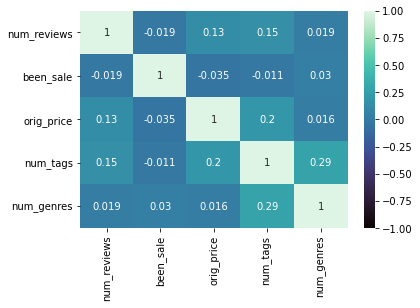

In [80]:
sns.heatmap(numbersdf.corr(), vmin = -1, vmax = 1, annot = True, cmap='mako')

In [91]:
print(model.score(X,y))  # appears initial score without limited features and no engineering has a .03 r squared.
print(model.coef_)
print(model.intercept_)


0.0328302298223444
[-1668.08354042   312.50037055   859.3763758   -477.32347604]
-8474.274915866785


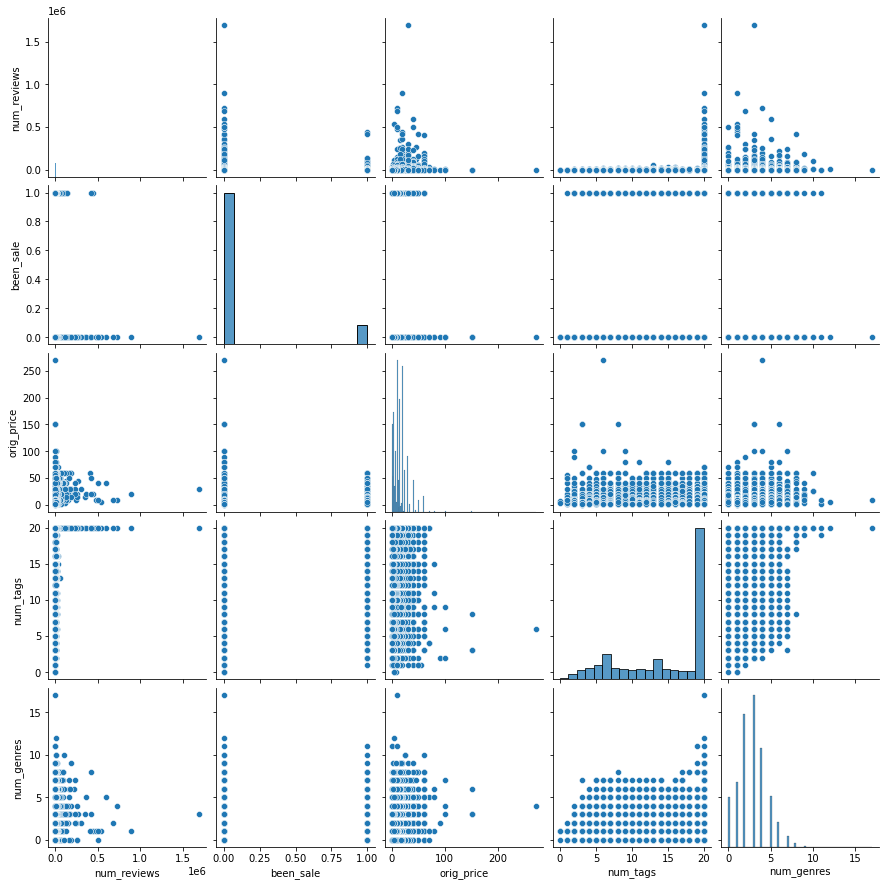

In [82]:
sns.pairplot(numbersdf)

# attempt 2 - statsmodels

I believe I got the model set up properly with sklearn, unfortunately there is little to no 
correlations with my data. attempting to use statsmodels for practice and for better understanding

In [94]:
statsmodel = smf.ols('num_reviews ~ been_sale + orig_price + num_tags + num_genres', data=numbersdf)

In [95]:
statsfit = statsmodel.fit()

In [97]:
statsfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            num_reviews   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     46.87
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           8.47e-39
Time:                        14:59:02   Log-Likelihood:                -66318.
No. Observations:                5528   AIC:                         1.326e+05
Df Residuals:                    5523   BIC:                         1.327e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8474.2749   1522.156     -5.567      0.000   -1.15e+04   -5490.250
been_sale  -1668.0835   1683.028     -0.991      0.322   -4967.481    1631.314
orig_price   312.5004     41.196      7.586      0.000     231.739     393.261
num_tags     859.3764     91.389      9.404      0.000     680.219    1038.534
num_genres  -477.3235    323.520     -1.475      0.140   -1111.551     156.904
==============================================================================
Omnibus:                    12682.930   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        121929430.119
Skew:                          21.922   Prob(JB):                         0.00
Kurtosis:                     729.250   Cond. No.                         79.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# attempt 3
going to try and build a model with dummy vairables, to try and get some relationship
